# Introduction to orthogonal coordinates

In $\mathbb{R}^3$, we can think that each point is given by the
intersection of three surfaces. Thus, we have three families of curved
surfaces that intersect each other at right angles. These surfaces are
orthogonal locally, but not (necessarily) globally, and  are
defined by

$$u_1 = f_1(x, y, z)\, ,\quad u_2 = f_2(x, y, z)\, ,\quad u_3=f_3(x, y, z) \, .$$

These functions should be invertible, at least locally, and we can also write

$$x = x(u_1, u_2, u_3)\, ,\quad y = y(u_1, u_2, u_3)\, ,\quad z = z(u_1, u_2, u_3)\, ,$$

where $x, y, z$ are the usual Cartesian coordinates. The curve defined by the intersection of two of the surfaces gives us
one of the coordinate curves.

## Scale factors

Since we are interested in how these surface intersect each other locally,
we want to express differential vectors in terms of the coordinates. Thus,
the differential for the position vector ($\mathbf{r}$) is given by

$$\mathrm{d}\mathbf{r} = \frac{\partial\mathbf{r}}{\partial u_1}\mathrm{d}u_1
+ \frac{\partial\mathbf{r}}{\partial u_2}\mathrm{d}u_2
+ \frac{\partial\mathbf{r}}{\partial u_3}\mathrm{d}u_3\, ,
$$

or

$$\mathrm{d}\mathbf{r} = \sum_{i=1}^3 \frac{\partial\mathbf{r}}{\partial u_i}\mathrm{d}u_i\, .$$

The factor $\partial \mathbf{r}/\partial u_i$ is a non-unitary vector that takes
into account the variation of $\mathbf{r}$ in the direction of $u_i$, and is then
tangent to the coordinate curve $u_i$. We can define a normalized basis $\hat{\mathbf{e}}_i$
using

$$\frac{\partial\mathbf{r}}{\partial u_i} = h_i \hat{\mathbf{e}}_i\, .$$

The coefficients $h_i$ are functions of $u_i$ and we call them _scale factors_. They
are really important since they allow us to _measure_ distances while we move along
our coordinates. We would need them to define vector operators in orthogonal coordinates.
When the coordinates are not orthogonal we would need to use the [metric tensor](https://en.wikipedia.org/wiki/Metric_tensor), but we are going to restrict ourselves to orthogonal systems.

Hence, we have the following

$$\begin{align}
&h_i = \left|\frac{\partial\mathbf{r}}{\partial u_i}\right|\, ,\\
&\hat{\mathbf{e}}_i = \frac{1}{h_i} \frac{\partial \mathbf{r}}{\partial u_i}\, .
\end{align}$$

## Curvilinear coordinates available

Continuum Mechanics has the following coordinate systems available:

- Cartesian;

- Cylindrical;

- Spherical;

- Parabolic cylindrical;

- Parabolic;

- Paraboloidal;

- Elliptic cylindrical;

- Oblate spheroidal;

- Prolate spheroidal;

- Ellipsoidal;

- Bipolar cylindrical;

- Toroidal;

- Bispherical; and

- Conical.


To obtain the transformation for a given coordinate system we can use
the function `transform_coords` in the `vector` module.

In [1]:
import sympy as sym
from continuum_mechanics import vector

First, we define the variables for the coordinates $(u, v, w)$.

In [2]:
sym.init_printing()
u, v, w = sym.symbols("u v w")

And, let's compute the coordinates for the **parabolic** system.

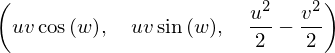

In [3]:
vector.transform_coords("parabolic", (u, v, w))

Let us ask for scale factors for bipolar cylindrical coordinates. The coordinates
are defined by

$$\begin{align}
&x = a \frac{\sinh\tau}{\cosh\tau - \cos\sigma}\, ,\\
&y = a \frac{\sin\sigma}{\cosh\tau - \cos\sigma}\, ,\\
&z = z\, ,
\end{align}$$

that has the following scale factors

$$h_\sigma = h_\tau = \frac{a}{\cosh\tau - \cos\sigma}\, ,$$

and $h_z = 1$.

In [4]:
sigma, tau, z, a = sym.symbols("sigma tau z a")
z = sym.symbols("z")
scale = vector.scale_coeff_coords("bipolar_cylindrical", (sigma, tau, z), a)

Finally, we can compute vector operators for different coordinates.


Let's try computing the Laplace operator for the bipolar cylindrical
system given by

$$
\nabla^2 \phi =
\frac{1}{a^2} \left( \cosh \tau - \cos\sigma \right)^{2}
\left( 
\frac{\partial^2 \phi}{\partial \sigma^2} + 
\frac{\partial^2 \phi}{\partial \tau^2} 
\right) + 
\frac{\partial^2 \phi}{\partial z^2}\, .$$

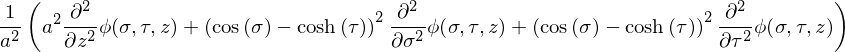

In [5]:
phi = sym.symbols("phi", cls=sym.Function)
lap = vector.lap(phi(sigma, tau, z), coords=(sigma, tau, z), h_vec=scale)
sym.simplify(lap)